In [2]:
from SurvSet.data import SurvLoader


loader = SurvLoader()
ds_lst = loader.df_ds
ds_lst.head(20)


,ds,is_td,n,n_fac,n_ohe,n_num
0,hdfail,False,52422,5,87,1
1,stagec,False,146,4,15,3
2,veteran,False,137,3,5,3
3,vdv,False,78,0,0,4705
4,AML_Bull,False,116,0,0,6283
5,LeukSurv,False,1043,2,24,5
6,zinc,False,431,11,18,2
7,burn,False,154,10,12,1
8,UnempDur,False,3241,1,1,5
9,nwtco,False,4028,5,7,2


In [2]:
from utils.dataset import load_datasets

load_datasets()

Dataset hdfail (1 of 76)
Dataset stagec (2 of 76)
Dataset veteran (3 of 76)
Dataset vdv (4 of 76)
Dataset AML_Bull (5 of 76)
Dataset LeukSurv (6 of 76)
Dataset zinc (7 of 76)
Dataset burn (8 of 76)
Dataset UnempDur (9 of 76)
Dataset nwtco (10 of 76)
Dataset rott2 (11 of 76)
Dataset epileptic (12 of 76)
Dataset gse1992 (13 of 76)
Dataset FRTCS (14 of 76)
Dataset cost (15 of 76)
Dataset rdata (16 of 76)
Dataset Aids2 (17 of 76)
Dataset divorce (18 of 76)
Dataset micro.censure (19 of 76)
Dataset cgd (20 of 76)
Dataset pharmacoSmoking (21 of 76)
Dataset Z243 (22 of 76)
Dataset NSBCD (23 of 76)
Dataset uis (24 of 76)
Dataset Dialysis (25 of 76)
Dataset nki70 (26 of 76)
Dataset Melanoma (27 of 76)
Dataset cancer (28 of 76)
Dataset heart (29 of 76)
Dataset TRACE (30 of 76)
Dataset gse4335 (31 of 76)
Dataset ova (32 of 76)
Dataset MCLcleaned (33 of 76)
Dataset smarto (34 of 76)
Dataset support2 (35 of 76)
Dataset vlbw (36 of 76)
Dataset pbc (37 of 76)
Dataset DLBCL (38 of 76)
Dataset phpl04K8a

In [3]:
from utils.config import load_datasets



# view random indicies
# 8: burn, 20: cgd, 39: phpl04K8a, 56: ovarian, 73: flchain
dataset = load_datasets(names=['burn', 'cgd', 'phpl04K8a', 'ovarian', 'flchain'], folder='../outputs/datasets')


# dataset['burn'].head()
# dataset['cgd'].head()
# dataset['phpl04K8a'].head()
# dataset['ovarian'].head()
# dataset['flchain'].head()


In [4]:
import numpy as np
import pandas as pd
from auton_survival.phenotyping import (
    IntersectionalPhenotyper, 
    ClusteringPhenotyper, 
    SurvivalVirtualTwinsPhenotyper
)

def identify_features(dataset: pd.DataFrame) -> pd.DataFrame:
    # Identify numerical features
    numerical_features = dataset.select_dtypes(include=[np.number]).columns.tolist()
    phenotyper_clustering = ClusteringPhenotyper(
        clustering_method='kmeans',
        dim_red_method='pca',
        random_seed=100
    )
    cluster_labels = phenotyper_clustering.fit_predict(dataset[numerical_features])
    dataset['phenotypes'] = cluster_labels

    return dataset


In [5]:
explore = identify_features(dataset['burn'])

explore

Fitting the following Dimensionality Reduction Model:
 PCA(random_state=100)
Fitting the following Clustering Model:
 KMeans(random_state=100)


C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,pid,event,time,num_burn_area,fac_burn_buttock,fac_burn_head,fac_burn_lower_leg,fac_burn_resp,fac_burn_trunk,fac_burn_type,fac_burn_upper_leg,fac_race,fac_sex,fac_treatment,phenotypes
78,78,1,2,9,Y,N,N,N,N,flame,Y,white,F,cleanse,2
5,5,1,8,20,N,Y,N,N,Y,flame,N,white,M,bath,1
20,20,0,43,16,N,N,N,N,Y,flame,N,white,M,bath,1
40,40,0,97,20,N,Y,N,Y,Y,flame,N,white,F,bath,4
86,86,0,67,50,Y,Y,Y,Y,Y,flame,Y,white,M,cleanse,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,0,14,3,N,N,N,N,Y,flame,N,white,F,cleanse,2
150,150,1,17,20,N,Y,N,N,Y,flame,N,white,F,cleanse,3
133,133,1,11,15,N,N,N,N,Y,flame,N,white,M,cleanse,3
122,122,0,7,15,N,N,N,N,Y,flame,N,white,M,cleanse,3


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auton_survival.reporting import plot_kaplanmeier, plot_nelsonaalen


def plot_analysis(dataset: pd.DataFrame) -> None:
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    numerical_features = dataset.select_dtypes(include=[np.number]).columns.tolist()

    # Correlation Analysis
    corr_matrix = dataset[numerical_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0, 0])
    axes[0, 0].set_title('Correlation Analysis')

    # Cluster Profile Analysis
    cluster_profile = dataset.groupby('phenotypes')[numerical_features].mean()
    cluster_profile.plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_title('Cluster Profile Analysis')

    # Feature Comparison Across Clusters
    for feature in numerical_features:
        sns.boxplot(x='phenotypes', y=feature, data=dataset, ax=axes[1, 0])
        axes[1, 0].set_title(f'Feature Comparison: {feature}')

    # Cluster Distribution
    sns.countplot(x='phenotypes', data=dataset, ax=axes[1, 1])
    axes[1, 1].set_title('Cluster Distribution')

    # Plot separate Kaplan-Meier survival estimates for phenogroups.

    # plot_kaplanmeier(dataset['event'], groups=dataset['phenotypes'])
    # plot_nelsonaalen(dataset['event'], groups=dataset['phenotypes'])

    plt.tight_layout()
    plt.show()

    # Create and show the pairplot in a separate figure
    pairplot_fig = sns.pairplot(dataset, hue='phenotypes', vars=numerical_features)
    pairplot_fig.fig.suptitle('Pairwise Feature Analysis', y=1.02)
    plt.show()

In [23]:
dataset_with_clusters = identify_features(dataset['burn'])


Fitting the following Dimensionality Reduction Model:
 PCA(random_state=100)
Fitting the following Clustering Model:
 KMeans(random_state=100)


C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


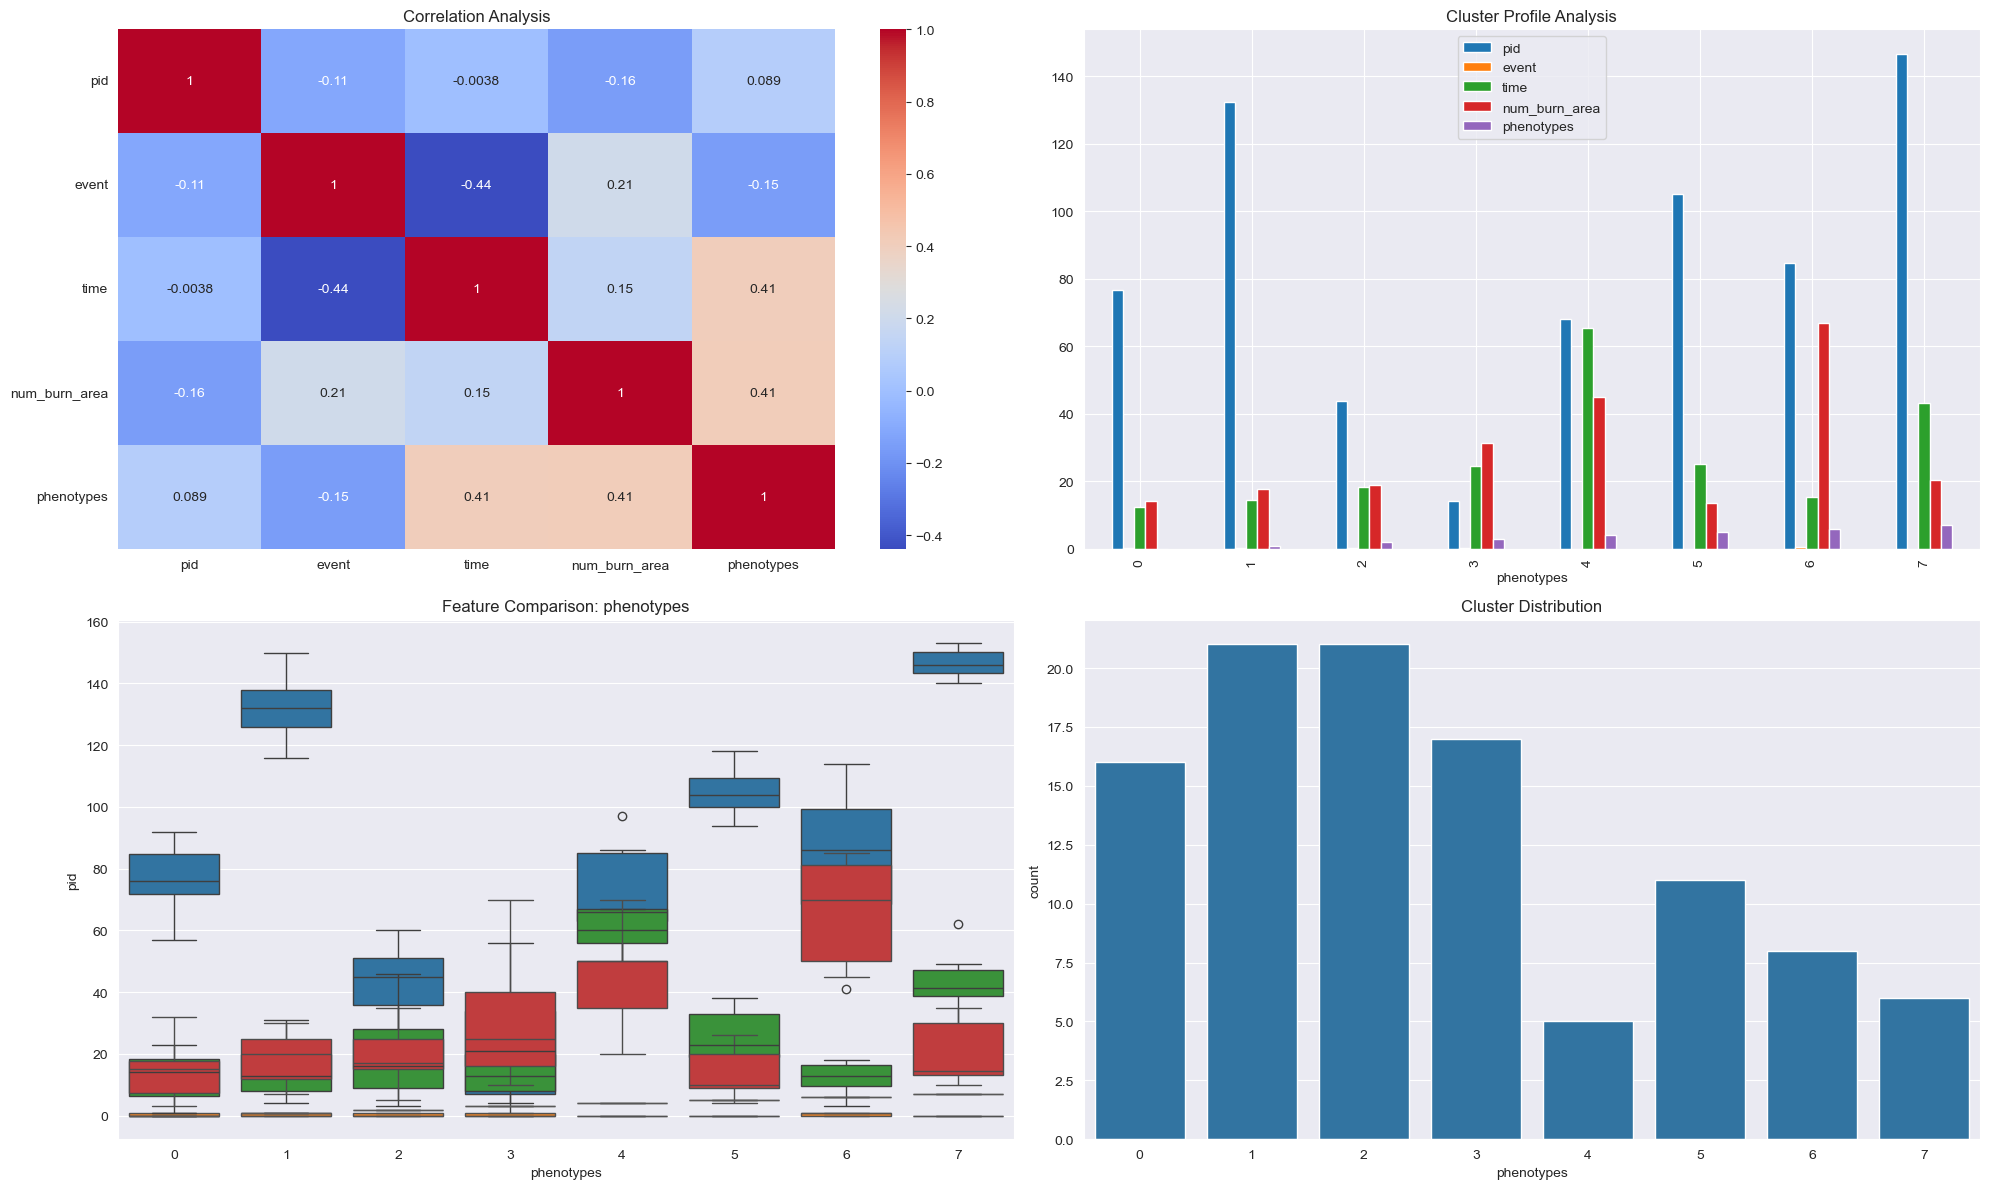

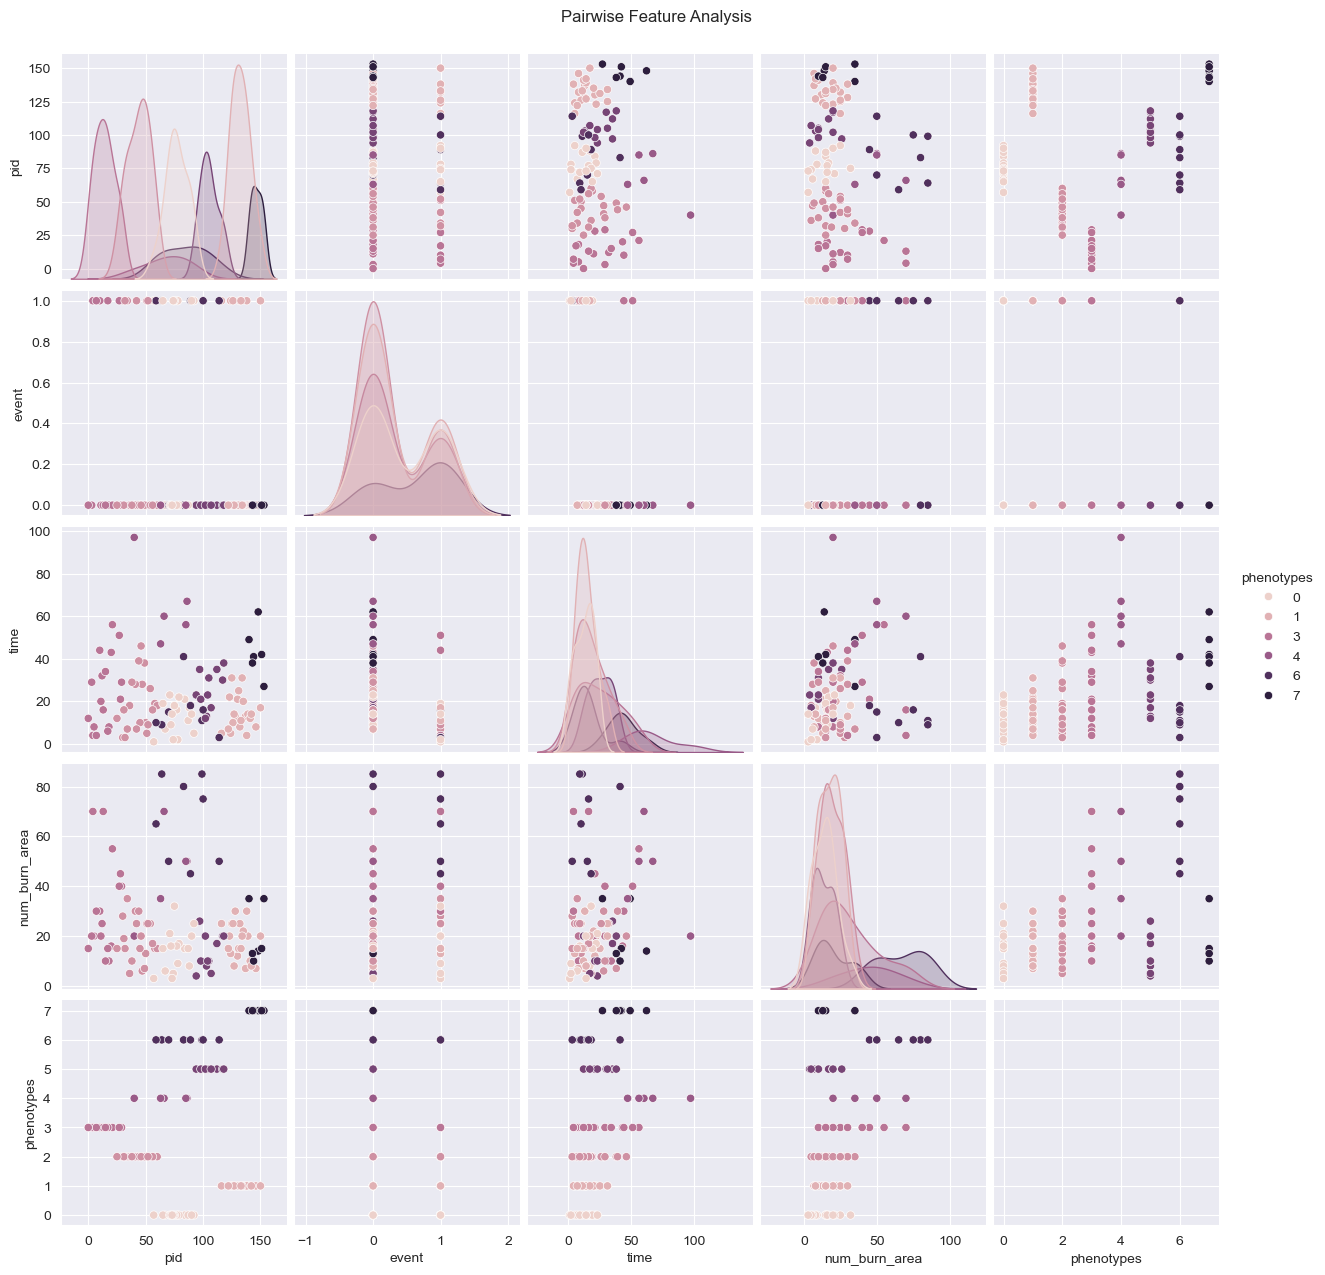

In [29]:
plot_analysis(dataset_with_clusters)

In [30]:
import synthcity

ModuleNotFoundError: No module named 'synthcity'